<a href="https://colab.research.google.com/github/rselent/project-canopy-ds/blob/master/notebooks/canopyDashboardVizTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

github_link = 'https://raw.githubusercontent.com/Lambda-School-Labs/project-canopy-ds/master/data/clean_data/'

ass = pd.read_csv( (github_link + "assessments.csv"), low_memory= False)
common = pd.read_csv( (github_link + "common_names.csv"), low_memory= False)
tax = pd.read_csv( (github_link + "taxonomy.csv"), low_memory= False)
cons = pd.read_csv( (github_link + "conservation_needed.csv"), low_memory= False)
countries = pd.read_csv( (github_link + "countries.csv"), low_memory= False)
habitats = pd.read_csv( (github_link + "habitats.csv"), low_memory= False)
research = pd.read_csv( (github_link + "research_needed.csv"), low_memory= False)
threats = pd.read_csv( (github_link + "threats.csv"), low_memory= False)
trade = pd.read_csv( (github_link + "usetrade.csv"), low_memory= False)
cites_listings = pd.read_csv( github_link + 'cites_listings.csv')

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Is one taxonomic rank (class) more threatened than another, in the aggregate? 

### Workwork:

In [ ]:
tax.className.value_counts()

MAGNOLIOPSIDA     1622
ACTINOPTERYGII    1299
AVES              1088
INSECTA            702
LILIOPSIDA         606
MAMMALIA           481
AMPHIBIA           363
GASTROPODA         182
REPTILIA            72
MALACOSTRACA        72
BIVALVIA            61
POLYPODIOPSIDA      45
ARACHNIDA            8
LYCOPODIOPSIDA       5
PINOPSIDA            4
CHONDRICHTHYES       3
CYCADOPSIDA          3
SARCOPTERYGII        3
GNETOPSIDA           2
MAXILLOPODA          1
Name: className, dtype: int64

In [ ]:
tax[ ass.redlistCategory.isin( ["Vulnerable", "Endangered", "Critically Endangered"])].className.value_counts()

MAGNOLIOPSIDA     523
ACTINOPTERYGII    148
LILIOPSIDA        126
MAMMALIA           73
AMPHIBIA           72
AVES               59
GASTROPODA         47
INSECTA            18
REPTILIA           16
BIVALVIA            8
MALACOSTRACA        6
POLYPODIOPSIDA      3
CHONDRICHTHYES      3
CYCADOPSIDA         1
MAXILLOPODA         1
Name: className, dtype: int64

In [ ]:
df_aggThreat = pd.merge( ass, tax, on= "scientificName", how= "inner", validate= "one_to_one")

In [ ]:
df_aggThreat_cats = df_aggThreat[ df_aggThreat.redlistCategory.isin( ["Vulnerable", "Endangered", "Critically Endangered"])]

df_aggThreat_cats.shape

(1104, 37)

In [ ]:
df_aggThreat_VU_ = df_aggThreat[ df_aggThreat.redlistCategory.isin( ["Vulnerable"])]
df_aggThreat_VU = df_aggThreat_VU_[ df_aggThreat_VU_.className.isin( ['MAMMALIA', 'AMPHIBIA', 'AVES', 'REPTILIA'])]

df_aggThreat_EN_ = df_aggThreat[ df_aggThreat.redlistCategory.isin( ["Endangered"])]
df_aggThreat_EN = df_aggThreat_EN_[ df_aggThreat_EN_.className.isin( ['MAMMALIA', 'AMPHIBIA', 'AVES', 'REPTILIA'])]

df_aggThreat_CR_ = df_aggThreat[ df_aggThreat.redlistCategory.isin( ["Critically Endangered"])]
df_aggThreat_CR = df_aggThreat_CR_[ df_aggThreat_CR_.className.isin( ['MAMMALIA', 'AMPHIBIA', 'AVES', 'REPTILIA'])]

In [ ]:
df_aggThreat_VU.className.value_counts()

MAMMALIA    37
AVES        36
AMPHIBIA    18
REPTILIA     8
Name: className, dtype: int64

In [ ]:
df_aggThreat_EN.className.value_counts()

AMPHIBIA    34
MAMMALIA    28
AVES        19
REPTILIA     3
Name: className, dtype: int64

In [ ]:
df_aggThreat_CR.className.value_counts()

AMPHIBIA    20
MAMMALIA     8
REPTILIA     5
AVES         4
Name: className, dtype: int64

In [ ]:
aggThreat_plot.redlistCategory.value_counts()

Vulnerable               99
Endangered               84
Critically Endangered    37
Name: redlistCategory, dtype: int64

### Results:

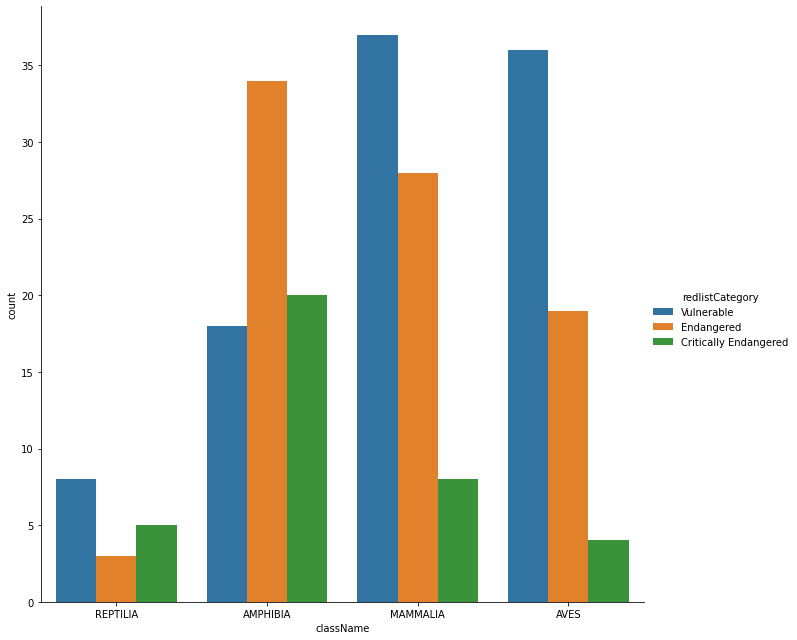

In [ ]:
aggThreat_plot = df_aggThreat_cats[ df_aggThreat_cats.className.isin( ['MAMMALIA', 'AMPHIBIA', 'AVES', 'REPTILIA'])]

f = sns.catplot( x= 'className',  hue= 'redlistCategory', data= aggThreat_plot,
                 height= 9, legend_out= True, kind= 'count', 
                 row_order= (['MAMMALIA', 'AMPHIBIA', 'AVES', 'REPTILIA']));

In [ ]:
classes = ['MAMMALIA', 'AMPHIBIA', 'AVES', 'REPTILIA']

fig = go.Figure( data= [
    go.Bar( name= 'Vulnerable', x= classes, y= df_aggThreat_VU.className.value_counts()),
    go.Bar( name= 'Endangered', x= classes, y= df_aggThreat_EN.className.value_counts()),
    go.Bar( name= 'Critically Endangered', x= classes, y= df_aggThreat_CR.className.value_counts())
])

fig.update_layout( barmode= 'stack')
fig.show()              ### WARNING: order of data isn't static (value_counts)
                        ### numbers are right, just in wrong categories
                        ### e.g., 2/3 of AMPHIBIA #s are in MAMMALIA

## What are the (most?) threatened species / classes?

### Workwork:

In [ ]:
# establish relevant taxonomic ranks
classes = ["MAMMALIA", "AMPHIBIA", "AVES", "REPTILIA"]
status = ["Vulnerable", "Endangered", "Critically Endangered"]

In [ ]:
# Most threatened classes
thr_class_count = df_aggThreat_cats[ df_aggThreat_cats.className.isin( 
    ['MAMMALIA', 'AMPHIBIA', 'AVES', 'REPTILIA', 'MAGNOLIOPSIDA', 'ACTINOPTERYGII'])].className.value_counts()
thr_class_count

MAGNOLIOPSIDA     523
ACTINOPTERYGII    148
MAMMALIA           73
AMPHIBIA           72
AVES               59
REPTILIA           16
Name: className, dtype: int64

In [ ]:
thr_class_count.sum()

891

In [ ]:
thr_species_list = threats.groupby( threats.scientificName).count().sort_values( by= ['assessmentId'], ascending= False)
# thr_species_list.head(10)

topTen = ['Trichechus senegalensis',
          'Loxodonta africana',
          'Aldrovanda vesiculosa',
          'Limosa limosa',
          'Hydrictis maculicollis',
          'Mecistops cataphractus',
          'Gorilla beringei',
          'Cercopithecus cephus',
          'Panthera pardus',
          'Bucorvus leadbeateri',
          'Lycaon pictus',
          'Calidris ferruginea',
          'Bugeranus carunculatus',
          'Balaeniceps rex',
          'Coffea arabica',
          'Aythya ferina',
          'Aonyx capensis',
          'Neophron percnopterus',
          'Mormyrus kannume',
          'Pan troglodytes'
]

thr_species_count = threats.scientificName.value_counts()[:20]

In [ ]:
thr_species_count

Trichechus senegalensis    35
Loxodonta africana         21
Aldrovanda vesiculosa      21
Limosa limosa              21
Hydrictis maculicollis     20
Mecistops cataphractus     20
Gorilla beringei           20
Cercopithecus cephus       19
Panthera pardus            19
Bucorvus leadbeateri       18
Lycaon pictus              18
Calidris ferruginea        17
Bugeranus carunculatus     17
Balaeniceps rex            16
Coffea arabica             15
Aythya ferina              15
Aonyx capensis             15
Neophron percnopterus      15
Mormyrus kannume           15
Pan troglodytes            15
Name: scientificName, dtype: int64

In [ ]:
df_commNames_ = pd.merge( ass, common, on= "scientificName", how= "left", validate= "one_to_many")

In [ ]:
df_commNames = df_commNames_[ df_commNames_.language_y.isin( ["English"])]

In [ ]:
df_commNames = df_commNames[ df_commNames.scientificName.isin( topTen)].copy()

In [ ]:
topTenTax = tax[ tax.scientificName.isin( topTen)]

In [ ]:
list( topTen)

### SUNBURST DATA

sunData = dict( names = ['Total<br>Threats', 'MAMMALIA', 'MAGNOLIOPSIDA', 'REPTILIA', 'AVES', 'ACTINOPTERYGII',
                         'Trichechus<br>senegalensis', 'Loxodonta<br>africana', 'Aldrovanda<br>vesiculosa', 'Limosa<br>limosa', 'Hydrictis<br>maculicollis', 
                         'Mecistops<br>cataphractus', 'Gorilla<br>beringei', 'Cercopithecus<br>cephus', 'Panthera<br>pardus', 'Bucorvus<br>leadbeateri', 
                         'Lycaon<br>pictus', 'Calidris<br>ferruginea', 'Bugeranus<br>carunculatus', 'Balaeniceps<br>rex', 'Coffea<br>arabica', 
                         'Aythya<br>ferina', 'Aonyx<br>capensis', 'Neophron<br>percnopterus', 'Mormyrus<br>kannume', 'Pan<br>troglodytes'
                ],
                parents = ['', 'Total<br>Threats', 'Total<br>Threats', 'Total<br>Threats', 'Total<br>Threats', 'Total<br>Threats',
                            'MAGNOLIOPSIDA', 'REPTILIA', 'MAMMALIA', 'MAMMALIA', 'MAMMALIA', 
                            'MAGNOLIOPSIDA', 'MAMMALIA', 'MAMMALIA', 'ACTINOPTERYGII', 'AVES', 
                            'MAMMALIA', 'AVES', 'AVES', 'MAMMALIA', 'MAMMALIA', 
                            'AVES', 'AVES', 'AVES', 'AVES', 'MAMMALIA'
                ],
                values = [891, 73, 523, 16, 59, 148, 
                        35, 21, 21, 21, 20, 20, 20, 19, 19, 18,
                        18, 17, 17, 16, 15, 15, 15, 15, 15, 15
                ],
                #species = list( topTen),
                #classes = list( topTenTax.className),
                #threats = list( thr_species_count.values)
)

### Results:

In [ ]:
# strip [NYI]

sns.catplot( x= classes, y= list( thr_class_count), #data= aggThreat_plot, 
             height= 9, legend_out= True, kind= 'strip', 
             row_order= (['MAMMALIA', 'AMPHIBIA', 'AVES', 'REPTILIA'])
);

In [ ]:
# sunburst

fig = px.sunburst( data_frame= data,
                   names= 'names',
                   parents= 'parents',
                   values= 'values',
                   title= 'Most Threatened Species by Class',                   
)
fig.show()
            ### NOTE: this is only a subsection of the top 20 species, ranked by 
            ###       aggregate number of threats affecting them.
            ###       Class MAGNOLIOPSIDA, also, does not belong... it's in our data,
            ###       but it's plants. 
            ###       It's there simply because getting rid of it for this 
            ###       proof of concept would have been more trouble than it's worth

## What are the 'hotspot habitats' of threatened species? What are the biodiversity hotspots?

### Workwork:

In [ ]:
df_habitatAss = pd.merge( ass, habitats, on= "scientificName", how= "left", validate= "one_to_many")

df_hotspots_thr = df_habitatAss[ df_habitatAss.redlistCategory.isin( ["Vulnerable", "Endangered", "Critically Endangered"])]

In [ ]:
# hotspot habitats of THREATENED SPECIES
df_hotspots_thr.name.value_counts()

Forest - Subtropical / Tropical Moist Lowland                                         531
Forest - Subtropical / Tropical Moist Montane                                         351
Wetlands (inland) - Permanent Rivers / Streams / Creeks (includes waterfalls)         290
Wetlands (inland) - Seasonal / Intermittent / Irregular Rivers / Streams / Creeks     101
Wetlands (inland) - Permanent Freshwater Lakes (over 8ha)                              88
Wetlands (inland) - Bogs, Marshes, Swamps, Fens, Peatlands                             86
Wetlands (inland) - Permanent Freshwater Marshes / Pools (under 8ha)                   83
Wetlands (inland) - Seasonal / Intermittent Freshwater Marshes / Pools (under 8ha)     79
Forest - Subtropical / Tropical Dry                                                    76
Forest - Subtropical / Tropical Swamp                                                  52
Artificial / Terrestrial - Subtropical / Tropical Heavily Degraded Former Forest       32
Wetlands (

In [ ]:
# hotspot habitats for general BIODIVERSITY
habitats.code.value_counts()

1.6     3117
5.1     2611
5.7     1510
5.8     1397
5.5     1291
5.2     1243
1.9     1242
5.4     1238
1.5      764
5.6      626
14.6     396
1.8      365
1.7      192
5.3      169
5.9      156
Name: code, dtype: int64

### Results:

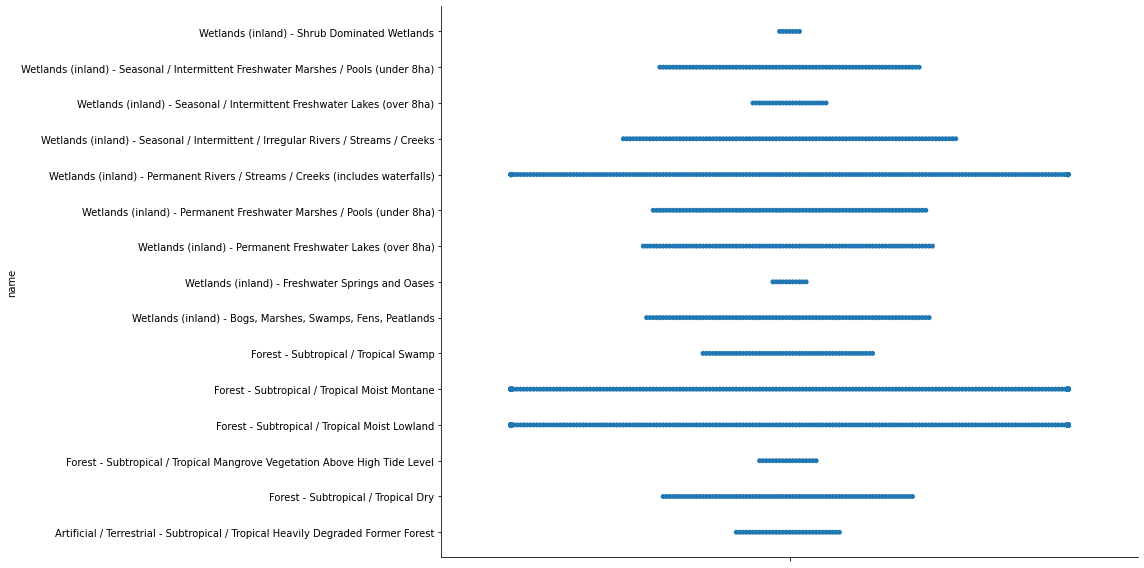

In [ ]:
# beeswarm is unavailable, please leave a message after th---

# ok, swarm plot instead:


sns.catplot( y= 'name', data= df_hotspots_thr,
             height= 8, aspect= 2, kind= 'swarm');



(16317,)

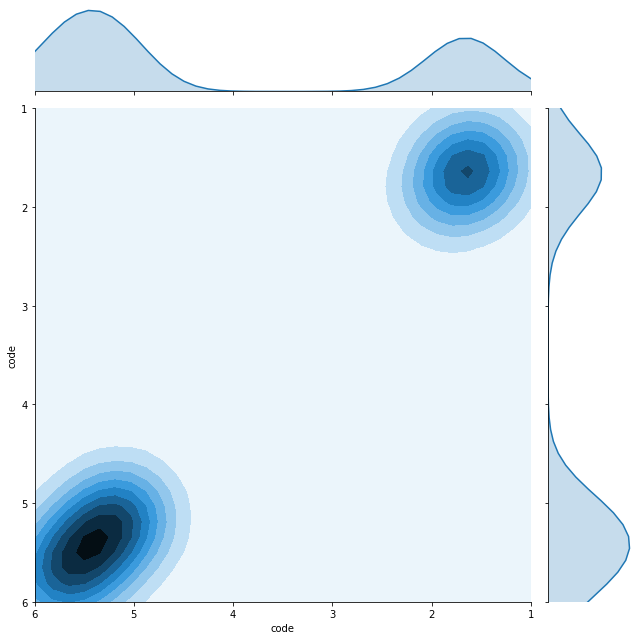

In [ ]:
# heatmap?

sns.jointplot(x= habitats.code, y= habitats.code, kind= "kde", xlim= 6, ylim= 6, height= 9, );
habitats.code.shape

In [ ]:
# heatmaps are relatively useless for codes, but the kde on top seems interesting...

# break up habitats into 3 main clusters (forest, wetlands, artificial), and that
# would theoretically show a more nuanced view of how 'hotspot-able' each habitat (code)
# is in relation to other similar habitats

## What are the human activities most responsible for biodiversity loss?

### Workwork:

In [ ]:
threats.code.value_counts().values

array([1164,  816,  540,  480,  474,  462,  434,  377,  372,  303,  289,
        285,  277,  248,  239,  220,  206,  199,  157,  143,  127,  120,
        119,  118,  114,  114,  109,  100,   88,   82,   77,   75,   75,
         74,   73,   72,   71,   71,   67,   65,   63,   59,   56,   55,
         53,   51,   51,   51,   50,   48,   48,   46,   38,   38,   32,
         32,   29,   28,   26,   25,   22,   22,   22,   22,   21,   20,
         20,   19,   18,   17,   10,    9,    8,    7,    7,    7,    6,
          6,    6,    6,    5,    5,    5,    4,    2,    1,    1,    1,
          1,    1,    1,    1,    1,    1])

In [ ]:
type( threats.iloc[24].code)

str

In [ ]:
len( threats.name.unique()), len( threats.name.value_counts())

(72, 72)

### Results:

In [ ]:
# bubble?

fig = px.scatter( threats.query( "year==2007"), x= "gdpPercap", y= "lifeExp",
	         size= "pop", color= "continent",
                 hover_name= "country", log_x= True, size_max= 60)
fig.show()

In [ ]:
# mmm, pie...

fig = px.pie( threats, values= threats.name.value_counts().values, names= threats.name.unique(), title= "I'm a little pie chart, flat and round")

fig.show()

In [ ]:
# Sankey??

# Random:

In [ ]:
laws = pd.read_excel( 'laws.xlsx', sheet_name= 'Cameroon')